In [1]:
from scipy.stats import mannwhitneyu
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("straightness_curvature_normalized.csv")

0.35568082631060416
2.2827468189207307
1.5233912726206773
0.058193757013085885


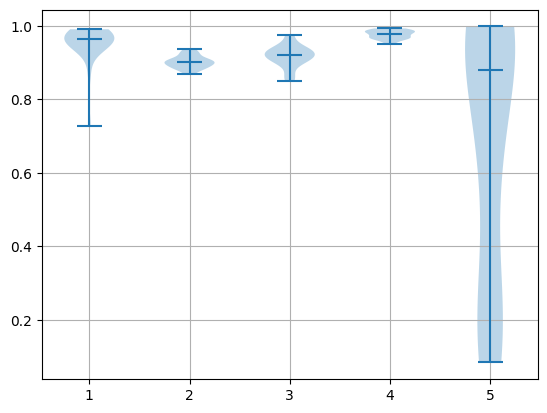

In [3]:
data = []
labels = []
for metric in ['straightness']:
    for treatment in ['tx', 'ctrl', 'ctrl2', 'ctrl3']:
        div = 1
        if metric == "curvature":
            # print(max(df['curvature']))
            div = max(df[df['treatment'] != 'in_vitro'][metric])
            print(div)
            # div = 50.32988897217656
        u_stat, p_value = mannwhitneyu(df[df['treatment'] == treatment][metric]/div,\
                                        df[df['treatment'] == 'in_vitro'][metric])
        # print(df[df['treatment'] == 'in_vitro'][metric])
        print(p_value*4)
        if treatment == 'tx':
            label = '+shape/+CD'
        if treatment == 'ctrl':
            label = '-shape/-CD'
        if treatment == 'ctrl2':
            label = '+shape/-CD'
        if treatment == 'ctrl3':
            label = '-shape/+CD'
        labels.append(label)
        data.append(df[df['treatment'] == treatment][metric])
        # print(max(df[df['treatment'] == treatment][metric]))
    data.append(df[df['treatment'] == 'in_vitro'][metric])
    labels.append("in_vitro")
    plt.violinplot(data, showmedians=True)#, labels=labels, colors=['k']*4)

    plt.grid()
    plt.show()